# MNIST Digit Classification

In this assignment, we will implement a fully-connected neural network and train it on [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. It includes digits (1-9) images and the task is to train a model to get an digit image as input and predict which digit it is correponds to.

We will use Keras and TensorFlow as one the core frameworks of deep learning studies.

## Import Libraries

In [3]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Prepare Data

In [16]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('TRAIN SHAPE: {}'.format(X_train.shape, y_train.shape))
print('TEST SHAPE: {}'.format(X_test.shape, y_test.shape))

TRAIN SHAPE: (60000, 28, 28)
TEST SHAPE: (10000, 28, 28)


Label: 3


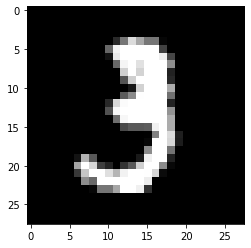

In [17]:
# plot a sample of the dataset

plt.imshow(X_train[10], cmap='gray')
print('Label: {}'.format(y_train[10]))

## Neural Net Model

In [18]:
# Model architecture
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=10, activation='softmax')                                 
])

print(model.summary())

# Model compilation
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics= ['accuracy']
              )

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


## Train

In [19]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=7, batch_size=32)

model.evaluate(X_test, y_test, verbose=2)

Epoch 1/7
1875/1875 [==============================] - 3s 2ms/step - loss: 2.4844 - accuracy: 0.7637 - val_loss: 0.4871 - val_accuracy: 0.8855
Epoch 2/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5534 - accuracy: 0.8576 - val_loss: 0.3488 - val_accuracy: 0.9123
Epoch 3/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4572 - accuracy: 0.8817 - val_loss: 0.3293 - val_accuracy: 0.9242
Epoch 4/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4156 - accuracy: 0.8957 - val_loss: 0.2869 - val_accuracy: 0.9335
Epoch 5/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3810 - accuracy: 0.9036 - val_loss: 0.2828 - val_accuracy: 0.9311
Epoch 6/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3693 - accuracy: 0.9065 - val_loss: 0.2858 - val_accuracy: 0.9343
Epoch 7/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3531 - accuracy: 0.9131 - val_loss: 0.3357 - val_accuracy: 0.9324

[0.3356597125530243, 0.9323999881744385]

## Prediction

Ground truth: 7
Prediction: 7


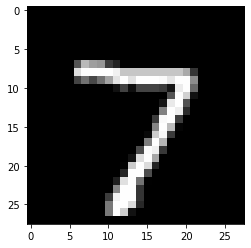

In [20]:
sample, label = X_test[0], y_test[0]
predictions = model.predict(np.reshape(sample, [-1, 28, 28]))

plt.imshow(sample, cmap='gray')
print('Ground truth: {}'.format(y_test[0]))
print('Prediction: {}'.format(np.argmax(predictions)))